<a href="https://colab.research.google.com/github/Elki-palki/homeworks/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BA%D1%80%D0%B0%D1%81%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B2%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование качества красного вина

In [7]:
import pandas as pd
import numpy as np

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import t, norm
from scipy import stats as st
from scipy.stats import shapiro
from sklearn.preprocessing import power_transform #преобразование Йео-Джонсона


import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import shap

import eli5
from eli5.sklearn import PermutationImportance

In [68]:
data = pd.read_csv('winequality-red.csv')

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
data['quality'].value_counts() #только вот показатели качества очень уж странные, это целые числа от 3 до 8. Ну ничего страшного

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [12]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Попробуем построить модель просто на всех данных

In [14]:
reg = LinearRegression().fit(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']], data['quality'])

In [15]:
reg.score(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']], data['quality'])

0.3605517030386879

### Разделение выборки на обучающую и тестовую

In [16]:
X = data.drop(["quality"], axis=1)
y = data[["quality"]]

In [17]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=700)

In [18]:
print ('Train set:', train_X.shape,  train_y.shape)
print ('Test set:', test_X.shape,  test_y.shape)

Train set: (1071, 11) (1071, 1)
Test set: (528, 11) (528, 1)


### Cтандартизация данных

In [19]:
scaler = StandardScaler()
scaler

StandardScaler()

In [20]:
# создадим объект класса StandardScaler и применим метод .fit()
st_scaler = StandardScaler().fit(train_X)
st_scaler

StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(train_X)

In [22]:
X_train_scaled.shape

(1071, 11)

In [23]:
# превратим массив в датафрейм с помощью функции pd.DataFrame()
data = pd.DataFrame(X_train_scaled, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol'])

In [24]:
X_test_scaled = scaler.transform(test_X)

In [25]:
data_2 = pd.DataFrame(X_test_scaled, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol'])

# Исследование распределения данных

## Обработка выбросов на трейне

In [26]:
#вспомним функцию, которая поможет определить не только число выбросов, но и их процентное соотношение, а также верхнюю и нижнюю границу усов
def ejection (col):
    q75 = np.percentile(col, 75)
    q25 = np.percentile(col, 25)
    iqr = q75 - q25
    ejection_h = q75 + 1.5*iqr
    ejection_l = q25 - 1.5*iqr
    ejection_count = col[(col > ejection_h) | (col < ejection_l)].count()
    ejection_perc = (ejection_count/len(col))*100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)

In [27]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [28]:
#Два первых числа - это границы усов, потос идёт количетво выбросов и общий процент от количества данных
for i in train_X.columns:
    print(i, ejection(train_X[i]))

fixed acidity (12.600000000000001, 3.799999999999998, 25, 2.3342670401493932)
volatile acidity (1.0, 0.040000000000000036, 15, 1.400560224089636)
citric acid (0.9275, -0.4125, 1, 0.09337068160597572)
residual sugar (3.6500000000000004, 0.8499999999999996, 98, 9.15032679738562)
chlorides (0.11999999999999998, 0.04000000000000002, 67, 6.2558356676003735)
free sulfur dioxide (44.5, -15.5, 18, 1.680672268907563)
total sulfur dioxide (125.75, -40.25, 34, 3.1746031746031744)
density (1.00135, 0.9921500000000001, 28, 2.6143790849673203)
pH (3.7100000000000004, 2.9099999999999997, 18, 1.680672268907563)
sulphates (0.9999999999999999, 0.28000000000000014, 37, 3.454715219421102)
alcohol (13.5, 7.1000000000000005, 12, 1.1204481792717087)


In [29]:
train_X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [30]:
x = remove_outlier(train_X, 'fixed acidity')
w = remove_outlier(x, 'volatile acidity')
a = remove_outlier(w, 'citric acid')
q = remove_outlier(a, 'free sulfur dioxide')
s = remove_outlier(q, 'total sulfur dioxide')
r = remove_outlier(s, 'density')
z = remove_outlier(r, 'pH')
f = remove_outlier(z, 'sulphates')
g = remove_outlier(f, 'alcohol')

In [31]:
for i in g.columns:
    print(i, ejection(g[i])) #количество выбросов сильно сократилось, однако есть столбцы, где выбросров очень много

fixed acidity (12.1, 4.1, 14, 1.5317286652078774)
volatile acidity (1.013125, 0.018124999999999947, 0, 0.0)
citric acid (0.9049999999999999, -0.4149999999999999, 0, 0.0)
residual sugar (3.4000000000000004, 0.9999999999999998, 75, 8.205689277899344)
chlorides (0.11599999999999999, 0.04399999999999999, 46, 5.032822757111598)
free sulfur dioxide (42.0, -14.0, 3, 0.3282275711159737)
total sulfur dioxide (113.5, -34.5, 14, 1.5317286652078774)
density (1.0011, 0.9923000000000001, 1, 0.10940919037199125)
pH (3.69125, 2.94125, 2, 0.2188183807439825)
sulphates (0.96875, 0.29875000000000007, 5, 0.5470459518599562)
alcohol (13.25, 7.25, 6, 0.6564551422319475)


<Axes: xlabel='residual sugar'>

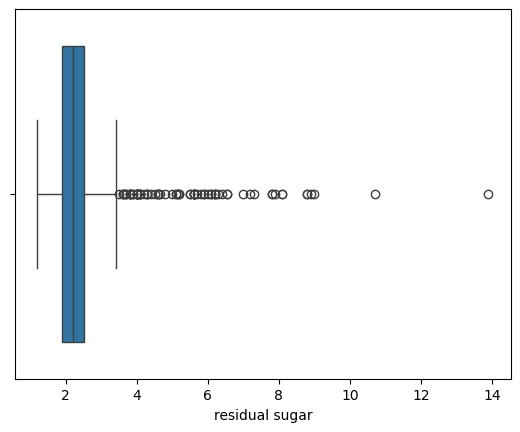

In [32]:
sns.boxplot(data=g, x='residual sugar') #обрубим выбросы до 3

In [33]:
g_g = g.loc[g['residual sugar'] <3]

<Axes: xlabel='chlorides'>

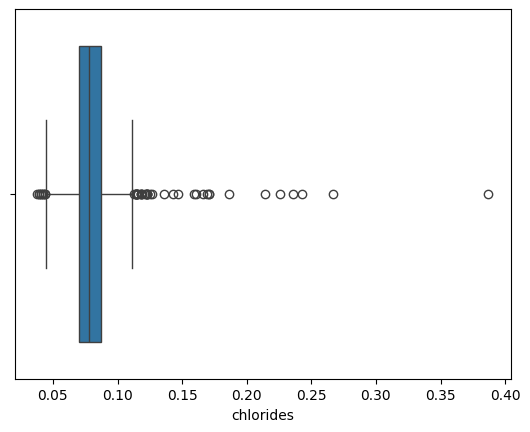

In [34]:
sns.boxplot(data=g_g, x='chlorides') #обрубим выбросы до 2

In [35]:
g_g_g = g_g.loc[g_g['chlorides'] <0.16]

## Обработка выбросов на тесте

In [36]:
df_out = test_X.loc[(test_X['fixed acidity'] > ejection(train_X['fixed acidity'])[1]) & (test_X['fixed acidity'] < ejection(train_X['fixed acidity'])[0])]

In [37]:
df_out_1 = df_out.loc[(df_out['volatile acidity'] > ejection(train_X['volatile acidity'])[1]) & (df_out['volatile acidity'] < train_X['volatile acidity'][0])]

In [38]:
df_out_2 = df_out_1.loc[(df_out_1['citric acid'] > ejection(train_X['citric acid'])[1]) & (df_out_1['citric acid'] < ejection(train_X['citric acid'])[0])]

In [39]:
df_out_3 = df_out_2.loc[(df_out_2['free sulfur dioxide'] > ejection(train_X['free sulfur dioxide'])[1]) & (df_out_2['free sulfur dioxide'] < ejection(train_X['free sulfur dioxide'])[0])]

In [40]:
df_out_4 = df_out_3.loc[(df_out_3['total sulfur dioxide'] > ejection(train_X['total sulfur dioxide'])[1]) & (df_out_3['total sulfur dioxide'] < ejection(train_X['total sulfur dioxide'])[0])]

In [41]:
df_out_5 = df_out_4.loc[(df_out_4['density'] > ejection(train_X['density'])[1]) & (df_out_4['density'] < ejection(train_X['density'])[0])]

In [42]:
df_out_6 = df_out_5.loc[(df_out_5['pH'] > ejection(train_X['pH'])[1]) & (df_out_5['pH'] < ejection(train_X['pH'])[0])]

In [43]:
df_out_7 = df_out_6.loc[(df_out_6['sulphates'] > ejection(train_X['sulphates'])[1]) & (df_out_6['sulphates'] < ejection(train_X['sulphates'])[0])]

In [44]:
df_out_8 = df_out_7.loc[(df_out_7['alcohol'] > ejection(train_X['alcohol'])[1]) & (df_out_7['alcohol'] < ejection(train_X['alcohol'])[0])]

In [45]:
df_out_9 = df_out_8.loc[(df_out_8['residual sugar'] < 3)]

In [46]:
df_out_10 = df_out_9.loc[(df_out_9['chlorides'] < 0.16)]

In [47]:
df_out_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 1534 to 310
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         340 non-null    float64
 1   volatile acidity      340 non-null    float64
 2   citric acid           340 non-null    float64
 3   residual sugar        340 non-null    float64
 4   chlorides             340 non-null    float64
 5   free sulfur dioxide   340 non-null    float64
 6   total sulfur dioxide  340 non-null    float64
 7   density               340 non-null    float64
 8   pH                    340 non-null    float64
 9   sulphates             340 non-null    float64
 10  alcohol               340 non-null    float64
dtypes: float64(11)
memory usage: 31.9 KB


## Проверка формы распределения

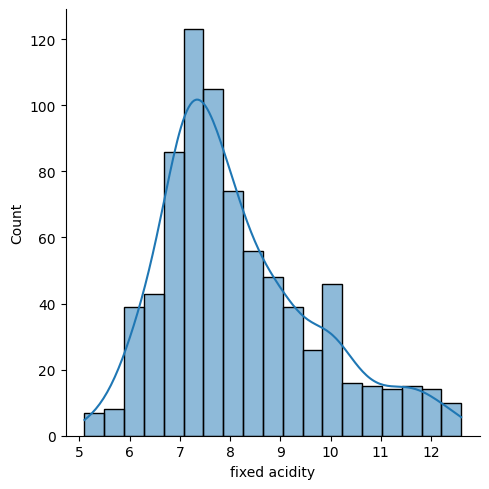

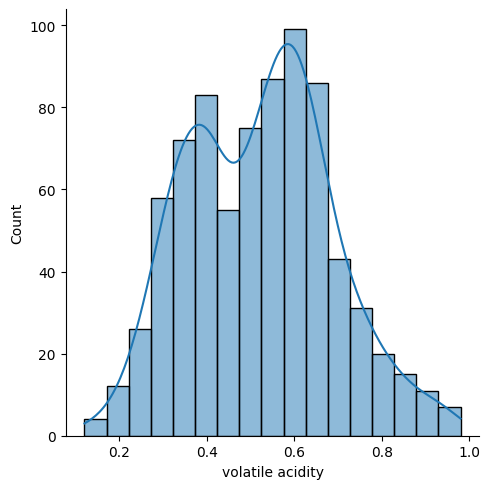

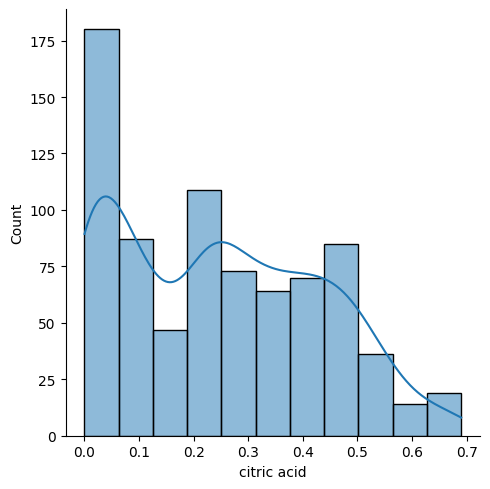

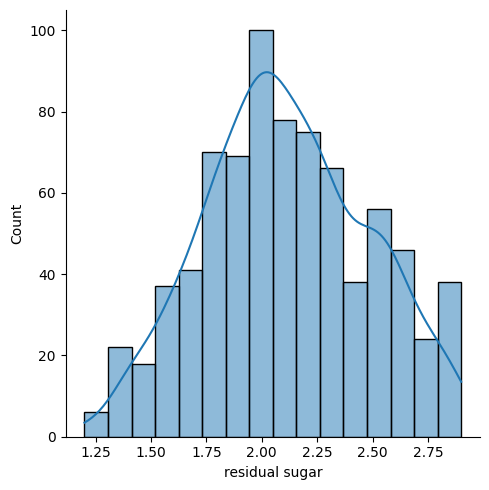

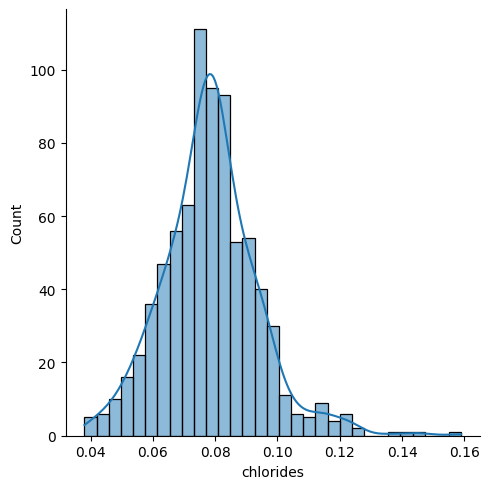

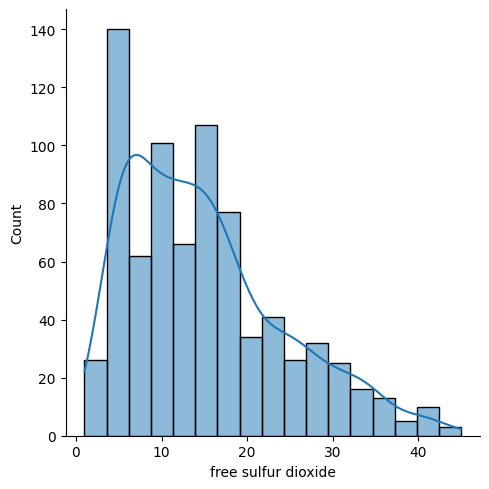

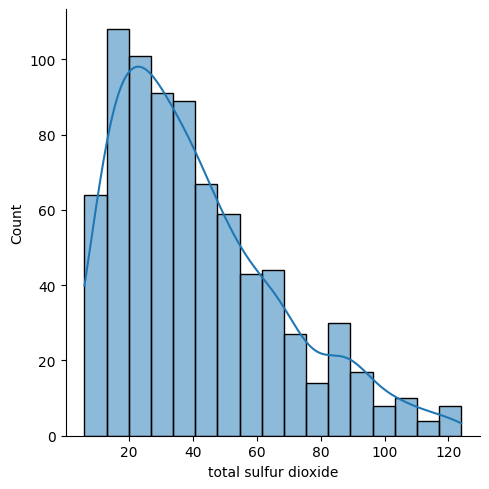

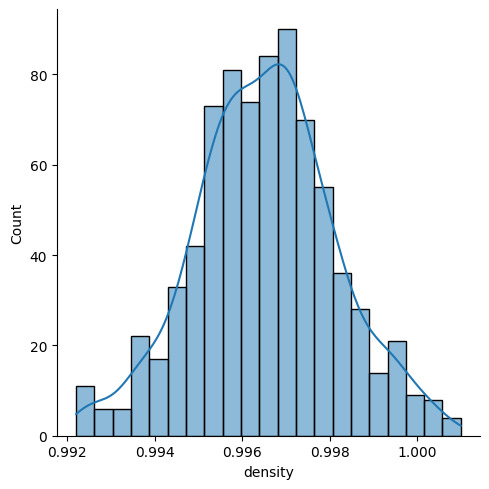

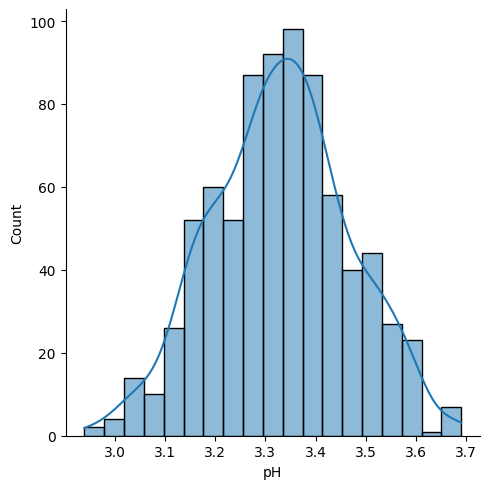

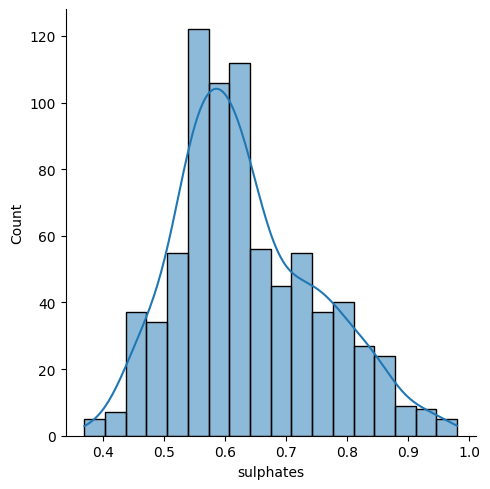

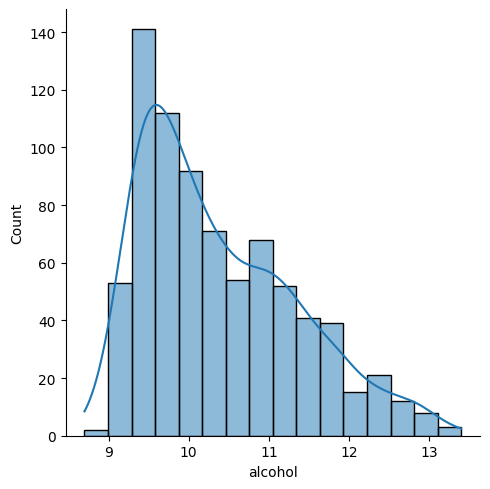

In [48]:
for i in g_g_g.columns:
    sns.displot(g_g_g, x=i, kde=True)
    plt.show()

In [ ]:
#Тест Шапиро-Уилка. Большинство данных не имеют нормальное распределение
for i in g_g_g.columns:
    sample = g[i]
    stat, p = st.shapiro(sample)
    alpha = 0.01
    if p < alpha:
        print('Для столбца ',i,'значение -', p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
    else:
        print('Для столбца ',i,'значение -', p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

Для столбца  fixed acidity значение - 2.7202293812519596e-17 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  volatile acidity значение - 4.021257301857033e-06 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  citric acid значение - 5.077150501541736e-17 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  residual sugar значение - 6.982329302607967e-41 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  chlorides значение - 4.656972636180523e-37 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  free sulfur dioxide значение - 9.147821850986028e-21 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  total sulfur dioxide значение - 6.536394042957556e-22 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  density значение - 0.02396975319492829 Не получилось отвер

# Попытки привести распределения к нормальному виду

### По тесту

In [ ]:
norm = g_g_g.copy()

## 1. fixed acidity

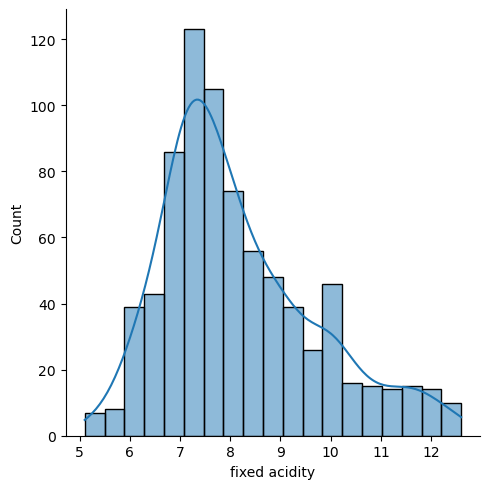

In [ ]:
sns.displot(norm, x='fixed acidity', kde=True)

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

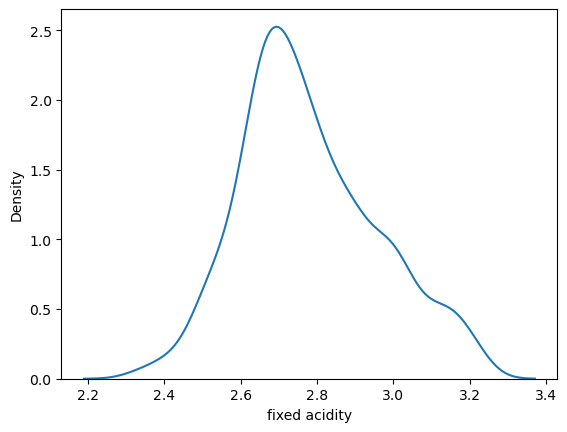

In [ ]:
transformed_data = np.log(norm['fixed acidity']+ np.sqrt(norm['fixed acidity']** 2 + 1)) #преобразование обратного гиперболического синуса
sns.kdeplot(transformed_data)

In [ ]:
sample = transformed_data
stat, p = st.shapiro(sample)
alpha = 0.01
if p < alpha:
    print('Для столбца ',i,'значение -', p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print('Для столбца ',i,'значение -', p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

Для столбца  alcohol значение - 8.259141175685185e-10 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


In [ ]:
yeo_jonson = power_transform(norm[['fixed acidity']], method='yeo-johnson').flatten()

<AxesSubplot:ylabel='Count'>

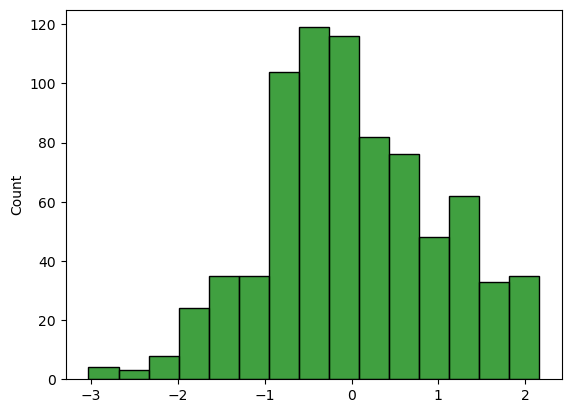

In [ ]:
sns.histplot(x = yeo_jonson, bins = 15, color = 'green')

In [ ]:
sample = yeo_jonson
stat, p = st.shapiro(sample)
alpha = 0.01
if p < alpha:
    print('Для столбца ',i,'значение -', p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print('Для столбца ',i,'значение -', p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

Для столбца  alcohol значение - 1.272685204934861e-05 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


# 2. volatile acidity

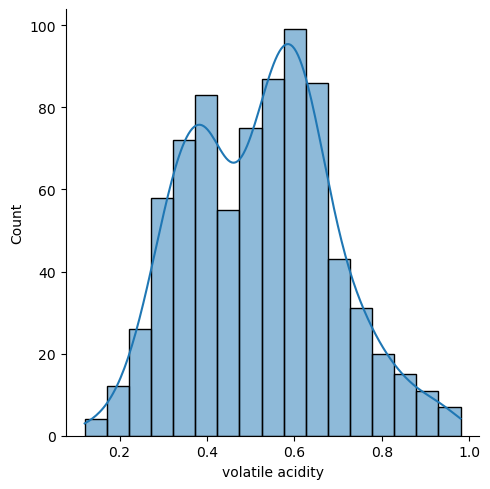

In [ ]:
sns.displot(norm, x='volatile acidity', kde=True)

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

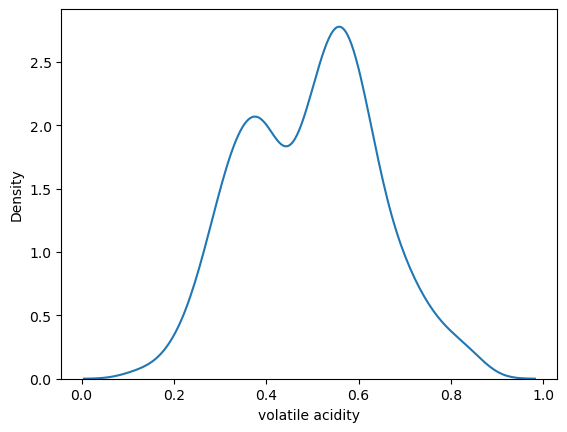

In [ ]:
transformed_data = np.log(norm['volatile acidity']+ np.sqrt(norm['volatile acidity']** 2 + 1)) #преобразование обратного гиперболического синуса
sns.kdeplot(transformed_data)

In [ ]:
sample = transformed_data
stat, p = st.shapiro(sample)
alpha = 0.01
if p < alpha:
    print('Для столбца ',i,'значение -', p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print('Для столбца ',i,'значение -', p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

Для столбца  alcohol значение - 6.619557591547828e-05 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


<AxesSubplot:ylabel='Count'>

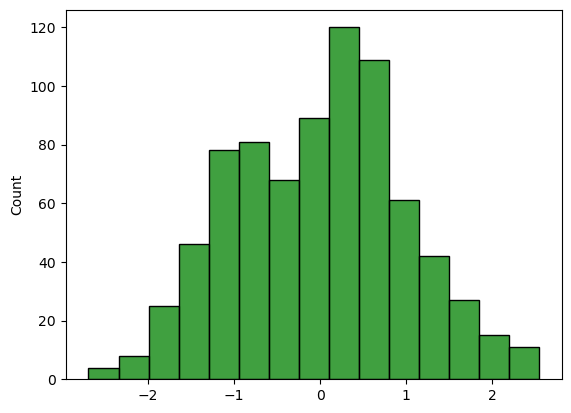

In [ ]:
yeo_jonson = power_transform(norm[['volatile acidity']], method='yeo-johnson').flatten()
sns.histplot(x = yeo_jonson, bins = 15, color = 'green')

In [ ]:
sample = yeo_jonson
stat, p = st.shapiro(sample)
alpha = 0.01
if p < alpha:
    print('Для столбца ',i,'значение -', p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print('Для столбца ',i,'значение -', p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

Для столбца  alcohol значение - 0.00014076698409704185 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


# 3. citric acid

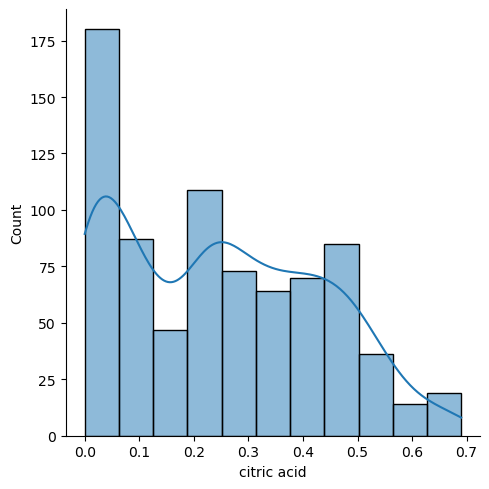

In [ ]:
sns.displot(norm, x='citric acid', kde=True)

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

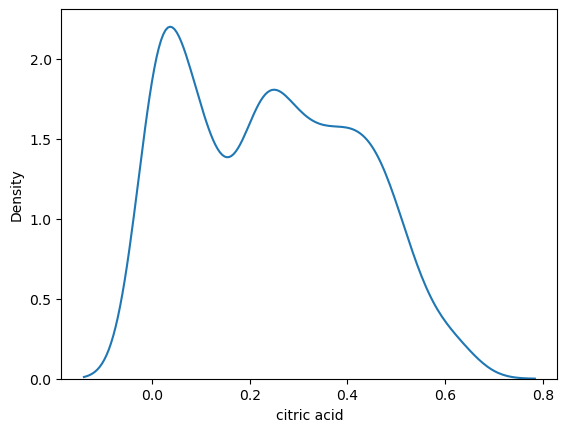

In [ ]:
transformed_data = np.log(norm['citric acid']+ np.sqrt(norm['citric acid']** 2 + 1)) #преобразование обратного гиперболического синуса
sns.kdeplot(transformed_data)

<AxesSubplot:ylabel='Count'>

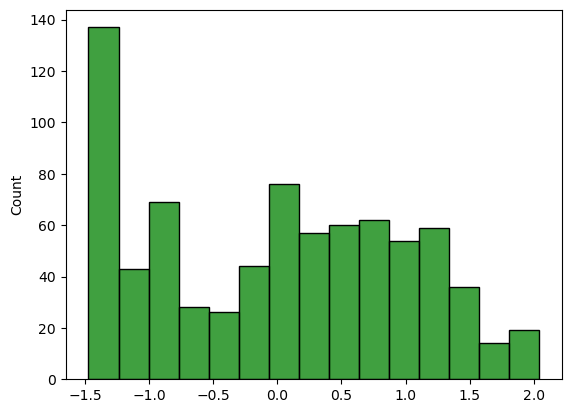

In [ ]:
yeo_jonson = power_transform(norm[['citric acid']], method='yeo-johnson').flatten()
sns.histplot(x = yeo_jonson, bins = 15, color = 'green')

In [ ]:
sample = transformed_data
stat, p = st.shapiro(sample)
alpha = 0.01
if p < alpha:
    print('Для столбца ',i,'значение -', p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print('Для столбца ',i,'значение -', p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

Для столбца  alcohol значение - 1.726818184227248e-16 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


# 4. residual sugar

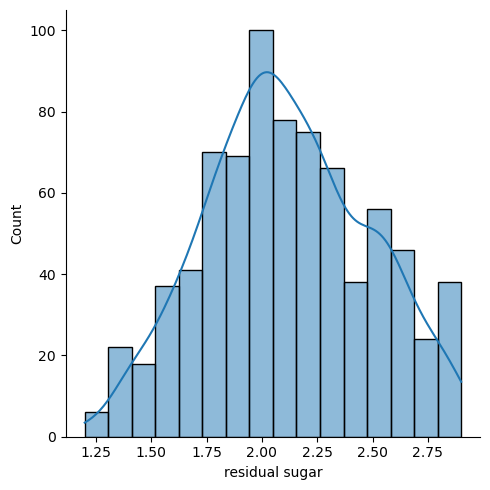

In [ ]:
sns.displot(norm, x='residual sugar', kde=True)

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

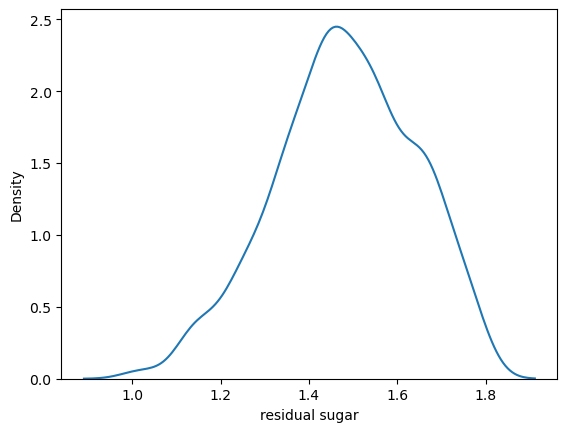

In [ ]:
transformed_data = np.log(norm['residual sugar']+ np.sqrt(norm['residual sugar']** 2 + 1)) #преобразование обратного гиперболического синуса
sns.kdeplot(transformed_data)

In [ ]:
sample = yeo_jonson
stat, p = st.shapiro(sample)
alpha = 0.01
if p < alpha:
    print('Для столбца ',i,'значение -', p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print('Для столбца ',i,'значение -', p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

Для столбца  alcohol значение - 1.6189703973791397e-16 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


<AxesSubplot:ylabel='Count'>

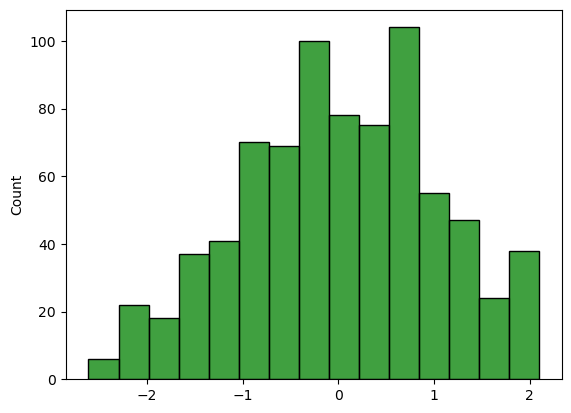

In [ ]:
yeo_jonson = power_transform(norm[['residual sugar']], method='yeo-johnson').flatten()
sns.histplot(x = yeo_jonson, bins = 15, color = 'green')

# 5. chlorides

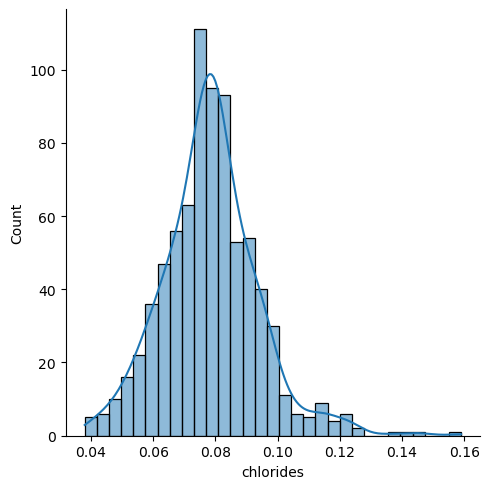

In [ ]:
sns.displot(norm, x='chlorides', kde=True)

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

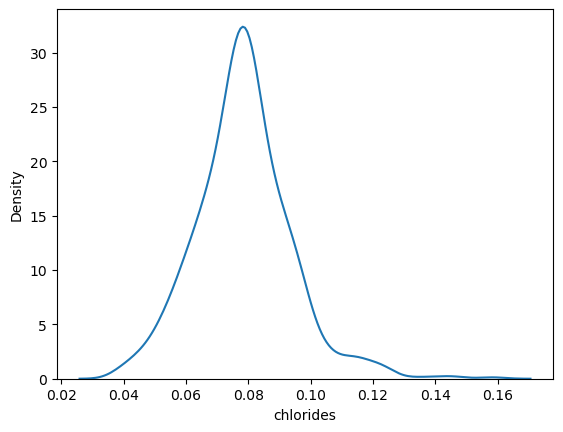

In [ ]:
transformed_data = np.log(norm['chlorides']+ np.sqrt(norm['chlorides']** 2 + 1)) #преобразование обратного гиперболического синуса
sns.kdeplot(transformed_data)

In [ ]:
sample = transformed_data
stat, p = st.shapiro(sample)
alpha = 0.01
if p < alpha:
    print('Для столбца ',i,'значение -', p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print('Для столбца ',i,'значение -', p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

Для столбца  alcohol значение - 3.021083932937973e-11 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


<AxesSubplot:ylabel='Count'>

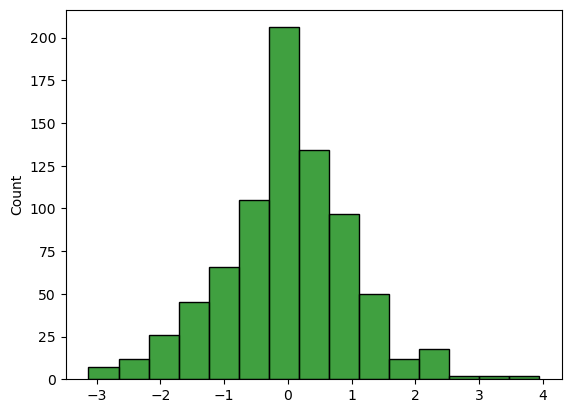

In [ ]:
yeo_jonson = power_transform(norm[['chlorides']], method='yeo-johnson').flatten()
sns.histplot(x = yeo_jonson, bins = 15, color = 'green')

In [ ]:
sample = yeo_jonson
stat, p = st.shapiro(sample)
alpha = 0.01
if p < alpha:
    print('Для столбца ',i,'значение -', p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print('Для столбца ',i,'значение -', p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

Для столбца  alcohol значение - 1.730418291300961e-06 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


# 6. free sulfur dioxide

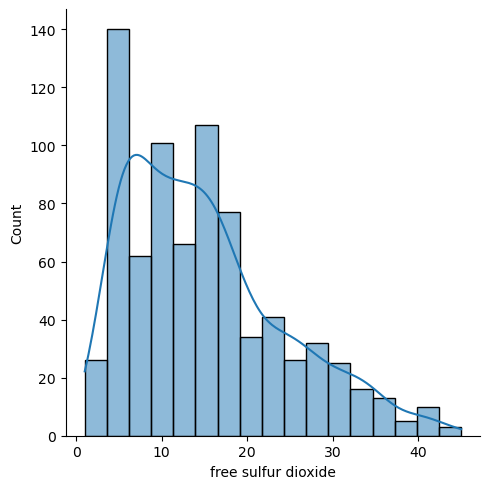

In [ ]:
sns.displot(norm, x='free sulfur dioxide', kde=True)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

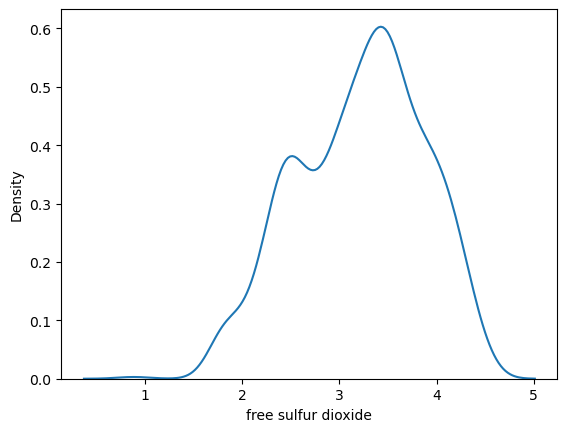

In [ ]:
transformed_data = np.log(norm['free sulfur dioxide']+ np.sqrt(norm['free sulfur dioxide']** 2 + 1)) #преобразование обратного гиперболического синуса
sns.kdeplot(transformed_data)

<AxesSubplot:ylabel='Count'>

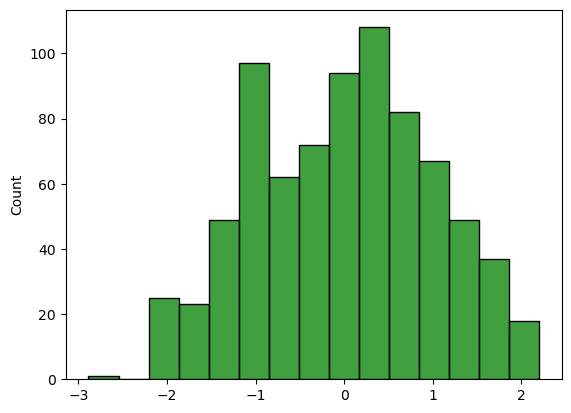

In [ ]:
yeo_jonson = power_transform(norm[['free sulfur dioxide']], method='yeo-johnson').flatten()
sns.histplot(x = yeo_jonson, bins = 15, color = 'green')

In [ ]:
sample = yeo_jonson
stat, p = st.shapiro(sample)
alpha = 0.01
if p < alpha:
    print('Для столбца ',i,'значение -', p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print('Для столбца ',i,'значение -', p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

Для столбца  alcohol значение - 3.767412693424332e-08 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


# 7. total sulfur dioxide

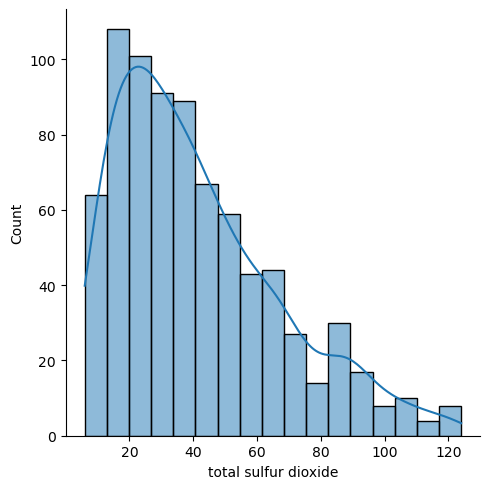

In [ ]:
sns.displot(norm, x='total sulfur dioxide', kde=True)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

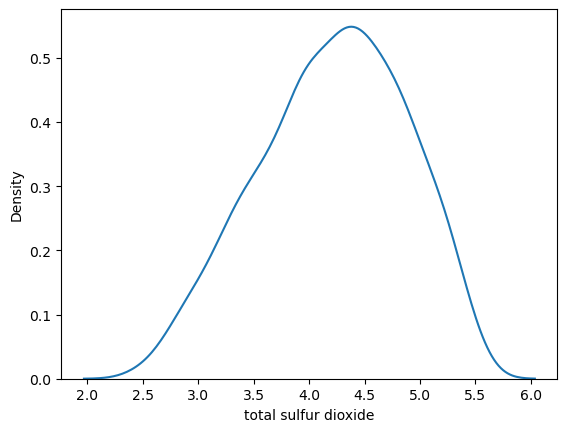

In [ ]:
transformed_data = np.log(norm['total sulfur dioxide']+ np.sqrt(norm['total sulfur dioxide']** 2 + 1)) #преобразование обратного гиперболического синуса
sns.kdeplot(transformed_data)

<AxesSubplot:ylabel='Count'>

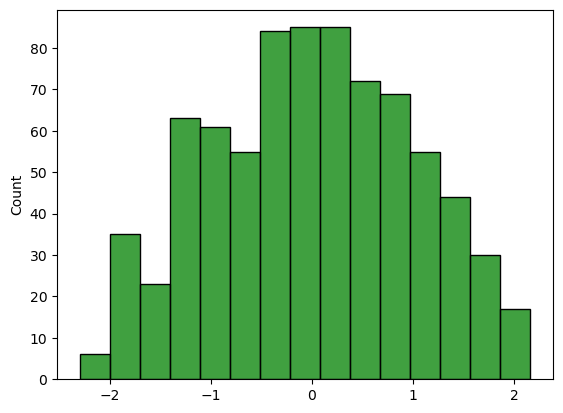

In [ ]:
yeo_jonson = power_transform(norm[['total sulfur dioxide']], method='yeo-johnson').flatten()
sns.histplot(x = yeo_jonson, bins = 15, color = 'green')

In [ ]:
sample = yeo_jonson
stat, p = st.shapiro(sample)
alpha = 0.01
if p < alpha:
    print('Для столбца ',i,'значение -', p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print('Для столбца ',i,'значение -', p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

Для столбца  alcohol значение - 4.349053678715242e-06 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


# 8. sulphates

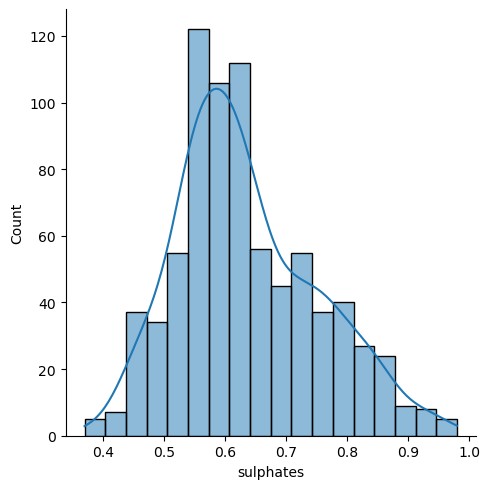

In [ ]:
sns.displot(norm, x='sulphates', kde=True)

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

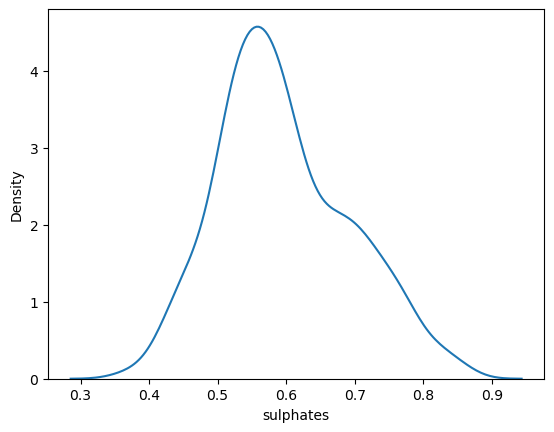

In [ ]:
transformed_data = np.log(norm['sulphates']+ np.sqrt(norm['sulphates']** 2 + 1)) #преобразование обратного гиперболического синуса
sns.kdeplot(transformed_data)

In [ ]:
sample = yeo_jonson
stat, p = st.shapiro(sample)
alpha = 0.01
if p < alpha:
    print('Для столбца ',i,'значение -', p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print('Для столбца ',i,'значение -', p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

Для столбца  alcohol значение - 4.349053678715242e-06 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


<AxesSubplot:ylabel='Count'>

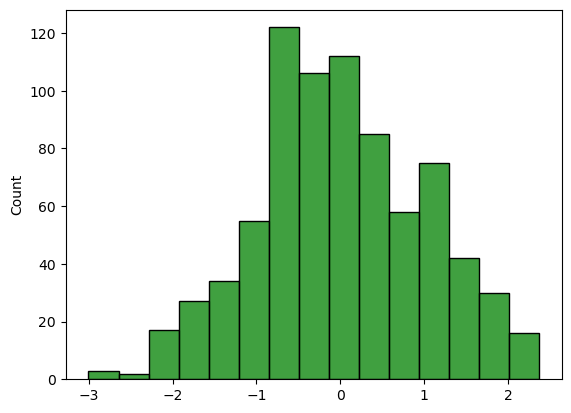

In [ ]:
yeo_jonson = power_transform(norm[['sulphates']], method='yeo-johnson').flatten()
sns.histplot(x = yeo_jonson, bins = 15, color = 'green')

# 9.alcohol

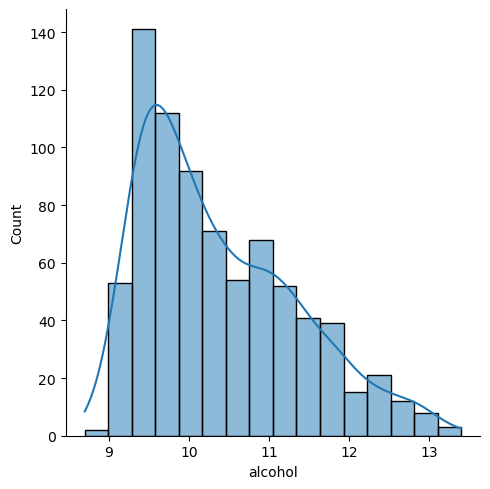

In [ ]:
sns.displot(norm, x='alcohol', kde=True)

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

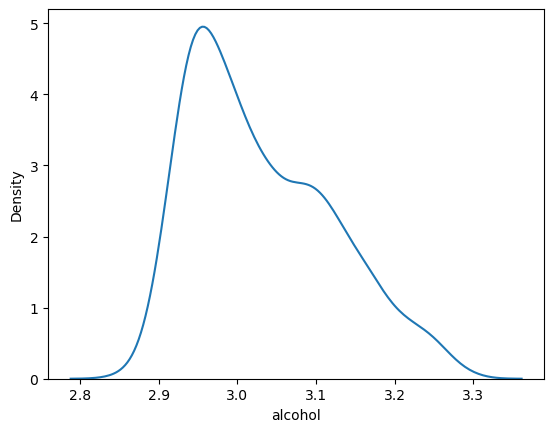

In [ ]:
transformed_data = np.log(norm['alcohol']+ np.sqrt(norm['alcohol']** 2 + 1)) #преобразование обратного гиперболического синуса
sns.kdeplot(transformed_data)

<AxesSubplot:ylabel='Count'>

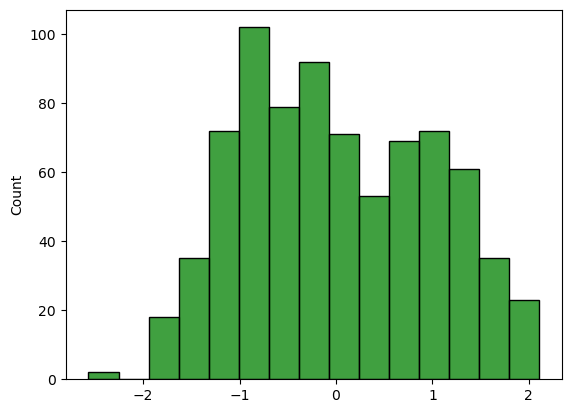

In [ ]:
yeo_jonson = power_transform(norm[['alcohol']], method='yeo-johnson').flatten()
sns.histplot(x = yeo_jonson, bins = 15, color = 'green')

# Отбор признаков

In [49]:
g = train_X.join(train_y)

In [50]:
corr = round(g.corr(method='spearman'), 2)
corr.style.background_gradient(cmap="cubehelix")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.290000,0.680000,0.230000,0.260000,-0.180000,-0.080000,0.620000,-0.730000,0.210000,-0.070000,0.110000
volatile acidity,-0.290000,1.000000,-0.610000,0.040000,0.160000,0.050000,0.130000,0.030000,0.240000,-0.300000,-0.220000,-0.410000
citric acid,0.680000,-0.610000,1.000000,0.180000,0.130000,-0.100000,-0.010000,0.360000,-0.580000,0.320000,0.080000,0.220000
residual sugar,0.230000,0.040000,0.180000,1.000000,0.250000,0.080000,0.150000,0.430000,-0.110000,0.050000,0.100000,0.040000
chlorides,0.260000,0.160000,0.130000,0.250000,1.000000,0.010000,0.140000,0.430000,-0.250000,-0.000000,-0.300000,-0.210000
free sulfur dioxide,-0.180000,0.050000,-0.100000,0.080000,0.010000,1.000000,0.790000,-0.020000,0.120000,0.030000,-0.120000,-0.070000
total sulfur dioxide,-0.080000,0.130000,-0.010000,0.150000,0.140000,0.790000,1.000000,0.150000,-0.020000,-0.010000,-0.290000,-0.210000
density,0.620000,0.030000,0.360000,0.430000,0.430000,-0.020000,0.150000,1.000000,-0.330000,0.160000,-0.470000,-0.180000
pH,-0.730000,0.240000,-0.580000,-0.110000,-0.250000,0.120000,-0.020000,-0.330000,1.000000,-0.070000,0.170000,-0.050000
sulphates,0.210000,-0.300000,0.320000,0.050000,-0.000000,0.030000,-0.010000,0.160000,-0.070000,1.000000,0.200000,0.370000


<Axes: >

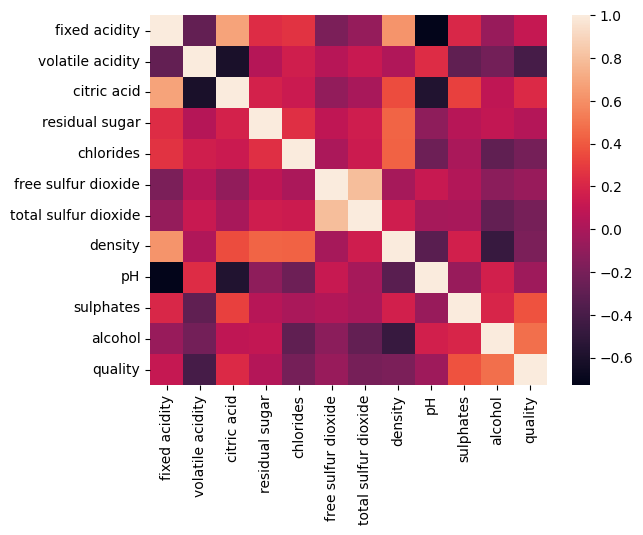

In [51]:
sns.heatmap(g.corr(method='spearman'))

In [52]:
reg = LinearRegression().fit(train_X, train_y)

In [53]:
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

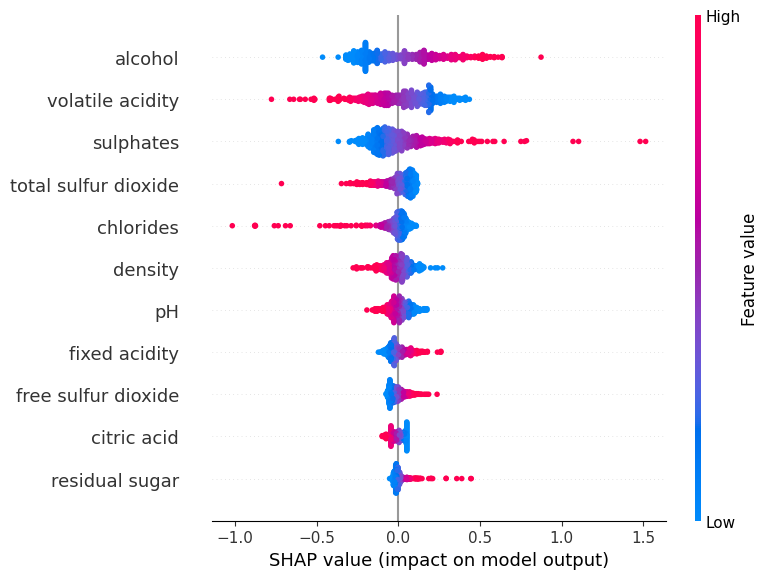

In [54]:
shap.summary_plot(shap_values, test_X)

In [55]:
reg = LinearRegression().fit(train_X, train_y)

In [56]:
perm = PermutationImportance(reg, random_state=5).fit(test_X, test_y)

In [57]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

Weight,Feature
0.1973 ± 0.0443,alcohol
0.1029 ± 0.0263,sulphates
0.0876 ± 0.0279,volatile acidity
0.0481 ± 0.0215,total sulfur dioxide
0.0292 ± 0.0074,chlorides
0.0150 ± 0.0127,density
0.0137 ± 0.0041,fixed acidity
0.0090 ± 0.0064,citric acid
0.0057 ± 0.0082,pH
0.0057 ± 0.0084,residual sugar


In [ ]:
test_X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

# Регрессия

In [58]:
train_X = train_X[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol','pH']]

In [59]:
test_X = test_X[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol','pH']]

In [60]:
model = LinearRegression()
model.fit(train_X, train_y)
# Оцениваем производительность модели
score = model.score(test_X, test_y)
# Получаем коэффициенты регрессии
coefficients = model.coef_
intercept = model.intercept_
print("Производительность модели (R-squared):", score)
print("Коэффициенты регрессии:", coefficients)
print("Свободный член:", intercept)
print(f"R2 на train: {model.score(train_X, train_y)}")

Производительность модели (R-squared): 0.2905940298340587
Коэффициенты регрессии: [[-1.14073122e+00 -2.71555923e+00 -1.83923091e-03  1.06469956e+00
   2.76968687e-01 -4.55876137e-01]]
Свободный член: [4.50297428]
R2 на train: 0.3815115846811654


In [61]:
#переменная density оказалась незначимой (?), поэтому я её исключила
y = train_y
x = train_X
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     109.4
Date:                Fri, 03 May 2024   Prob (F-statistic):          2.03e-107
Time:                        11:45:26   Log-Likelihood:                -1045.5
No. Observations:                1071   AIC:                             2105.
Df Residuals:                    1064   BIC:                             2140.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.5030 

# Полиномиальные признаки

In [62]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [63]:
X_poly.shape #сгенерировали много полиномиальных признаков

(1599, 78)

In [64]:
poly.get_feature_names_out(X.columns)

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

In [65]:
df = pd.DataFrame(data=X_poly, columns=poly.get_feature_names_out(X.columns))

In [66]:
df = df.drop('1', axis=1)

In [69]:
df = df.join(data['quality'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 78 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   fixed acidity                             1599 non-null   float64
 1   volatile acidity                          1599 non-null   float64
 2   citric acid                               1599 non-null   float64
 3   residual sugar                            1599 non-null   float64
 4   chlorides                                 1599 non-null   float64
 5   free sulfur dioxide                       1599 non-null   float64
 6   total sulfur dioxide                      1599 non-null   float64
 7   density                                   1599 non-null   float64
 8   pH                                        1599 non-null   float64
 9   sulphates                                 1599 non-null   float64
 10  alcohol                             

### Отбор признаков

In [71]:
corr = round(df.corr(method='spearman'), 2)
corr.style.background_gradient(cmap="cubehelix")

In [72]:
X = df.drop(["quality"], axis=1)
y = df[["quality"]]

In [73]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=10)

In [74]:
reg = LinearRegression().fit(train_X, train_y)

In [75]:
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

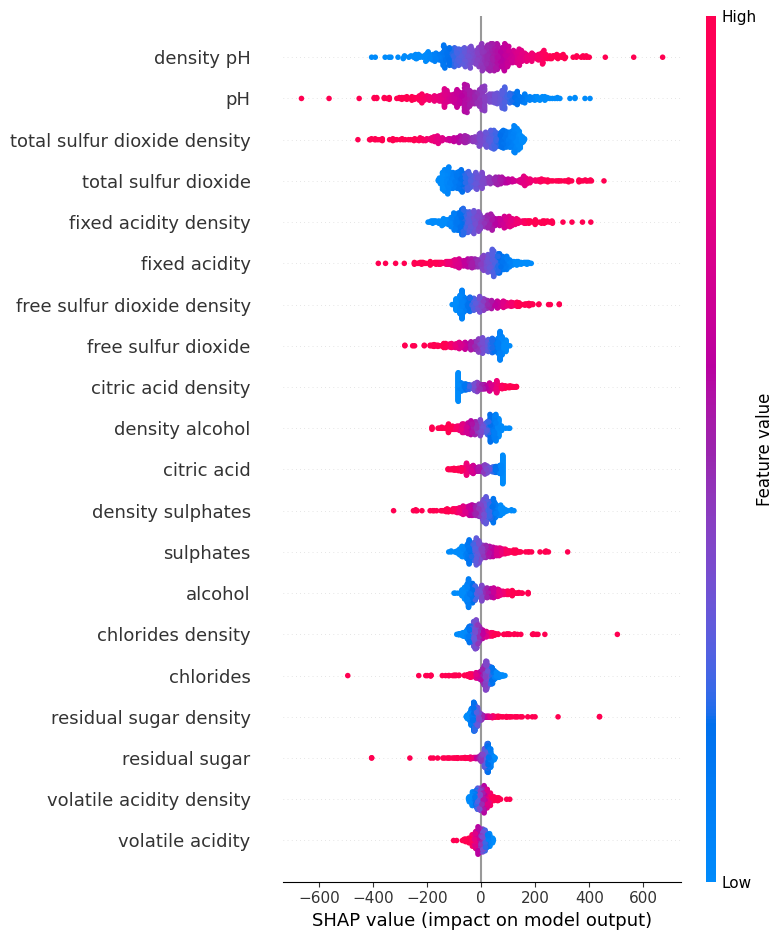

In [76]:
shap.summary_plot(shap_values, test_X)

In [77]:
reg = LinearRegression().fit(train_X, train_y)

In [78]:
perm = PermutationImportance(reg, random_state=5).fit(test_X, test_y)

In [79]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

Weight,Feature
62534.0842 ± 4422.3290,density pH
58315.4256 ± 5567.8653,pH
45758.6547 ± 5646.5315,total sulfur dioxide density
45082.2826 ± 3712.8658,total sulfur dioxide
26500.3347 ± 1481.7694,fixed acidity density
24757.5802 ± 1229.9142,fixed acidity
16489.8704 ± 990.8943,free sulfur dioxide density
15981.2000 ± 1204.5783,free sulfur dioxide
10547.6540 ± 494.2589,density sulphates
10292.0274 ± 560.3178,sulphates


In [80]:
train_X = train_X[['density pH', 'pH', 'total sulfur dioxide density', 'total sulfur dioxide', 'fixed acidity density',
                   'fixed acidity','free sulfur dioxide density','free sulfur dioxide','density sulphates','sulphates',
                   'citric acid density','density alcohol', 'alcohol', 'citric acid', 'residual sugar density', 'chlorides density',
                   'chlorides', 'residual sugar', 'volatile acidity density', 'volatile acidity']]

In [81]:
test_X = test_X[['density pH', 'pH', 'total sulfur dioxide density', 'total sulfur dioxide', 'fixed acidity density',
                   'fixed acidity','free sulfur dioxide density','free sulfur dioxide','density sulphates','sulphates',
                   'citric acid density','density alcohol', 'alcohol', 'citric acid', 'residual sugar density', 'chlorides density',
                   'chlorides', 'residual sugar', 'volatile acidity density', 'volatile acidity']]

In [82]:
model = LinearRegression()

In [83]:
model.fit(train_X, train_y)
# Оцениваем производительность модели
score = model.score(test_X, test_y)
# Получаем коэффициенты регрессии
coefficients = model.coef_
intercept = model.intercept_
print("Производительность модели (R-squared):", score)
print("Коэффициенты регрессии:", coefficients)
print("Свободный член:", intercept)
print(f"R2 на train: {model.score(train_X, train_y)}")

Производительность модели (R-squared): 0.3558877780258305
Коэффициенты регрессии: [[  56.31324598  -56.35326362   -1.25504882    1.24721743   -5.08238106
     5.10436665    1.32733875   -1.31858735 -235.01182481  235.17153867
   -20.68721207    1.7856169    -1.50748444   20.31469538    6.19025764
    56.27251871  -57.89336139   -6.18144833   26.95484327  -28.1072006 ]]
Свободный член: [3.67751189]
R2 на train: 0.36959023929132895


In [84]:
#как-то слишком много переменных, которые не значимы по t-критерию.
#Есть идея исключить незначимые переменные и сотавить только значимые
import statsmodels.api as sm
y = train_y
x = train_X
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     30.78
Date:                Fri, 03 May 2024   Prob (F-statistic):           7.64e-91
Time:                        11:47:25   Log-Likelihood:                -1029.3
No. Observations:                1071   AIC:                             2101.
Df Residuals:                    1050   BIC:                             2205.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Убираем из признаков незначимые по t-критерию

In [85]:
train_X = train_X[['density pH', 'pH', 'total sulfur dioxide density', 'total sulfur dioxide', 'free sulfur dioxide density',
                   'density sulphates','sulphates']]

In [86]:
test_X = test_X[['density pH', 'pH', 'total sulfur dioxide density', 'total sulfur dioxide', 'free sulfur dioxide density',
                   'density sulphates','sulphates']]

In [87]:
model = LinearRegression()

In [88]:
model.fit(train_X, train_y)
# Оцениваем производительность модели
score = model.score(test_X, test_y)
# Получаем коэффициенты регрессии
coefficients = model.coef_
intercept = model.intercept_
print("Производительность модели (R-squared):", score)
print("Коэффициенты регрессии:", coefficients)
print("Свободный член:", intercept)

Производительность модели (R-squared): 0.18224322078366006
Коэффициенты регрессии: [[ 4.57987345e+01 -4.59962012e+01 -1.47890122e+00  1.46728665e+00
   8.96632372e-03 -2.30999994e+02  2.31451456e+02]]
Свободный член: [6.18869209]


In [89]:
import statsmodels.api as sm
y = train_y
x = train_X
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     27.54
Date:                Fri, 03 May 2024   Prob (F-statistic):           6.32e-35
Time:                        11:47:39   Log-Likelihood:                -1187.2
No. Observations:                1071   AIC:                             2390.
Df Residuals:                    1063   BIC:                             2430.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Лассо

In [90]:
from sklearn.metrics import r2_score
from sklearn. linear_model import LassoCV
from sklearn. model_selection import RepeatedKFold
from numpy import arange

In [91]:
X = df.drop(["quality"], axis=1)
y = df[["quality"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [102]:
#define predictor and response variables
X = X_train
y = y_train
cv = RepeatedKFold(n_splits= 10, n_repeats= 1, random_state= 100)

model = LassoCV(alphas= arange(0, 1, 0.01), cv=cv, n_jobs=-1)
model.fit(X, y)

print(model.alpha_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.00140682684656, tolerance: 0.07670112945264991
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not conv

0.03


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.109e+00, tolerance: 8.586e-02
  model = cd_fast.enet_coordinate_descent(


In [103]:
y_pred  = model.predict(X_test)

In [104]:
# Выводим среднеквадратичную ошибку
print("Среднеквадратичная ошибка Лассо:", mean_squared_error(y_test, y_pred))

Среднеквадратичная ошибка Лассо: 0.41716005633610065


In [105]:
coefficients = model.coef_
intercept = model.intercept_
print("Коэффициенты регрессии:", coefficients)
print("Свободный член:", intercept)
score = model.score(X_test, y_pred)
print("Производительность модели (R-squared):", score)

Коэффициенты регрессии: [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.49711175e-03
 -2.28191076e-04 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -3.09419131e-04 -2.65494171e-04  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  6.76847462e-03 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.78827816e-02  1.27771252e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.21349194e-01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.90680994e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  3.10520414e-03
 -7.23077262e-04 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.78788250e-04 -0.00000000e+00 -0.00000000e+00 -2.45915339e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.85751779e-04 -1.67130251e-04  0.00000000e+00 -0.00000000e+00
 